In [ ]:
# This is a model selction notebook for predicting delivery times using decision tree regression 

In [ ]:
"""
some code attribution 
1. Raschka, S. (2015). Python Machine Learning. Birmingham, England: Packt Publishing.
2. Lopez de Prado, M. (2018). Advances in financial machine learning. Nashville, TN: John Wiley & Sons.
3. Hull, J.C. (2019). Machine Learning in Business.  

"""

In [28]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
from sklearn.tree import DecisionTreeRegressor, plot_tree, export_graphviz, export_text
from IPython.display import Image
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error
from sklearn.metrics import roc_curve, auc, average_precision_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,cross_val_score

import math

In [22]:
# load data
DATA_FOLDER = 'C:/Users/bscot/OneDrive/Documents/DoorDash/DoorDash2'
data = pd.read_csv(os.path.join(DATA_FOLDER, 'historical_imputed.csv'))
X = data.drop('total delivery duration seconds', axis=1)
y = data[['total delivery duration seconds']]

# divide data into training set and test set for holdout method
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.80,random_state=100)

print('X_train dataframe is: ',X_train.shape)
print('y_train dataframe is: ',y_train.shape)
print('X_test dataframe is: ',X_test.shape)
print('y_test dataframe is: ',y_test.shape)

X_train dataframe is:  (39485, 90)
y_train dataframe is:  (39485, 1)
X_test dataframe is:  (157943, 90)
y_test dataframe is:  (157943, 1)


In [23]:
# Create decsion tree data sets (informed by nn PCA)

X_train_dtr = X_train[['total_items',
                                    'min_item_price',
                                    'subtotal',
                                    'order_protocol',
                                    'estimated_store_to_consumer_driving_duration',
                                    'num_distinct_items',
                                    'max_item_price',
                                    'estimated_order_place_duration',
                                    'store_id',
                                    'market_id',
                                    'total_outstanding_orders',
                                    'total_onshift_dashers',
                                    'total_busy_dashers',]]


X_test_dtr = X_test[['total_items',
                                    'min_item_price',
                                    'subtotal',
                                    'order_protocol',
                                    'estimated_store_to_consumer_driving_duration',
                                    'num_distinct_items',
                                    'max_item_price',
                                    'estimated_order_place_duration',
                                    'store_id',
                                    'market_id',
                                    'total_outstanding_orders',
                                    'total_onshift_dashers',
                                    'total_busy_dashers',]]


print(X_train_dtr.shape)
print(X_test_dtr.shape)

(39485, 13)
(157943, 13)


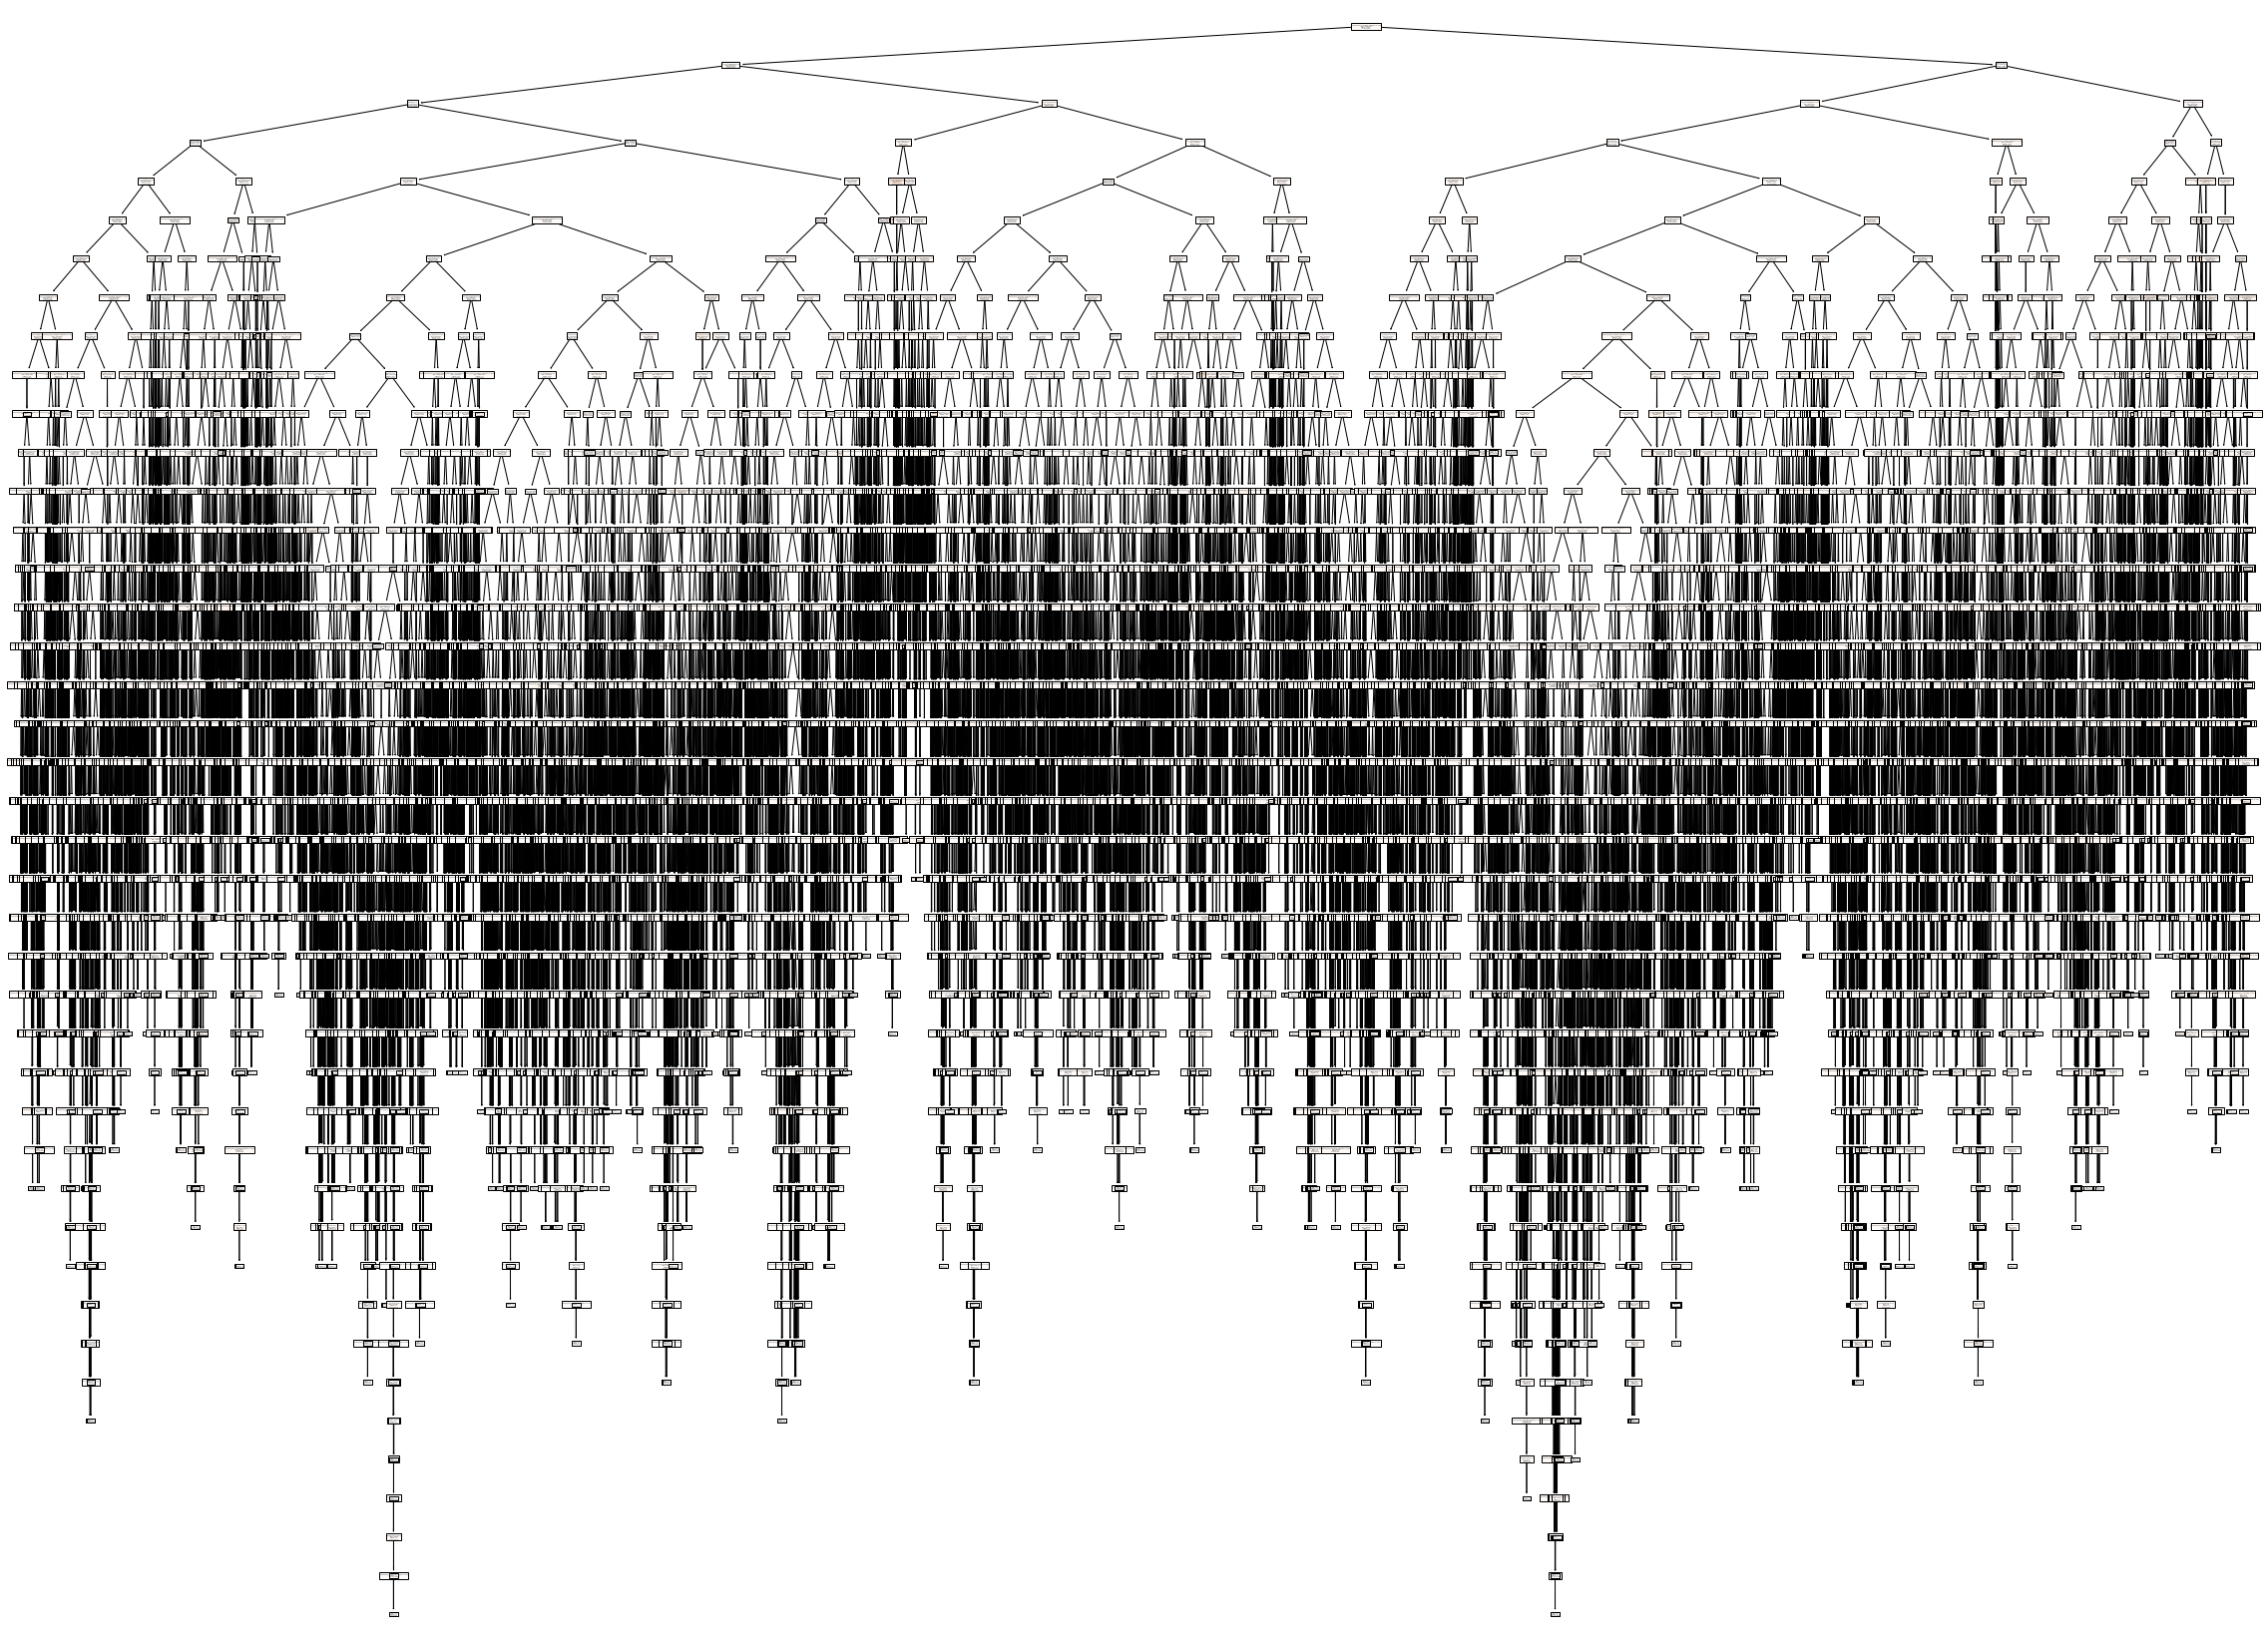

done in 1999.190s


In [24]:
t0 = time()
# train model
pred = DecisionTreeRegressor(criterion='mse',random_state=0)
pred = pred.fit(X_train_dtr,y_train)
fig, ax = plt.subplots(figsize=(40, 30))
plot_tree(pred, filled=True, feature_names=X_train_dtr.columns, proportion=False)
plt.show()

t0_dtr = (time() - t0)
print("done in %0.3fs" % (t0_dtr))

In [25]:
# score 
y_pred_train=pred.predict(X_train_dtr)
mse = mean_squared_error(y_pred_train,y_train)
rmse=math.sqrt(mse)
print("rmse for training set")
print(rmse)

rmse for training set
1.833219554337524


In [26]:
y_pred_test=pred.predict(X_test_dtr)
mse = mean_squared_error(y_pred_test,y_test)
rmse=math.sqrt(mse)
print("rmse for test set")
print(rmse)

rmse for test set
1479.9401373101728


In [30]:
scores_dtr = cross_val_score(pred, X_train_dtr, y_train, scoring='neg_root_mean_squared_error', cv=5, n_jobs=-1)
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores_dtr),np.std(scores_dtr)))
print("score without cv: {}".format(pred.score(X_train_dtr, y_train)))

CV accuracy: -1651.385 +/- 169.014
score without cv: 0.9999978231741748
